## ONNX Inferencing

### Writing  Inference Code for Prediction

This script is intended to perform inference on a pre-trained MNIST model.

Reference: 
https://thenewstack.io/tutorial-using-a-pre-trained-onnx-model-for-inferencing/

In [1]:
import json
import sys
import os
import time
import numpy as np
import cv2
import onnx
import onnxruntime
from onnx import numpy_helper

from pathlib import Path, PureWindowsPath

In [2]:
# Initialize variables to store model path and model files
cur_dir = os.getcwd()
model_dir = Path(os.getcwd())
model = "mnist-8.onnx"

img_dir = PureWindowsPath("C:\\Users\\aaram\\Desktop\\Code 717\\Machine Learning\\Databases\\mnist_db")
img_name = "img_1.jpg"
img_path = Path(img_dir) / img_name

if not img_path.exists():
    print("ERROR: Image file does not exist")
else:
    print("Image found! \n")

print("Current Dir: ", cur_dir)
print("")
print("Model: ", model)
print("")
print("Image Loc:", img_path)

Image found! 

Current Dir:  C:\Users\aaram\Desktop\Code 717\Machine Learning\ML Projects\ONNX\Mi2 Tutorials

Model:  mnist-8.onnx

Image Loc: C:\Users\aaram\Desktop\Code 717\Machine Learning\Databases\mnist_db\img_1.jpg


## Load Image and Preprocess 

The following converts the image to grayscale and resizes to an 28x28 array. The array is used as an input to the model.

Image Shape  (28, 28)


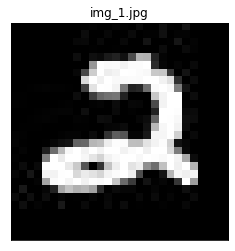

In [7]:
# Load and Preprocess the Image using OpenCV
# Note: imread is not reading in the absolute path for some reason

# Use cv2 to read an image from working directory (in grayscale)
img = cv2.imread(img_name, 0)
# Show image
from matplotlib import pyplot as plt
print("Image Shape ", img.shape) # imshow requires 2D array for plotting
plt.imshow(img, 'gray')
plt.title(img_name)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)

img.resize((1, 1, 28, 28))

In [4]:
# Convert image into a NumPy array of type float32
data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')

In [5]:
# Pass the data to model for inference
data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')
session = onnxruntime.InferenceSession(model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

print("Input Name: ", input_name)
print("Output Name: ", output_name)

Input Name:  Input3
Output Name:  Plus214_Output_0


### Print prediction from infered

In [6]:
# Pass input to session and print the prediction
result = session.run([output_name], {input_name: data})
prediction=int(np.argmax(np.array(result).squeeze(), axis=0))
print("Predicted Value ", prediction)

Predicted Value  2
